Dataset loaded
  raw_label                                               text
0   neutral  Technopolis plans to develop in stages an area...
1  negative  The international electronic industry company ...
2  positive  With the new production plant the company woul...
3  positive  According to the company 's updated strategy f...
4  positive  FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...

Classification Report:

              precision    recall  f1-score   support

    Negative     0.8889    0.0661    0.1231       121
     Neutral     0.6931    0.9722    0.8092       576
    Positive     0.6447    0.3603    0.4623       272

    accuracy                         0.6873       969
   macro avg     0.7422    0.4662    0.4649       969
weighted avg     0.7040    0.6873    0.6262       969



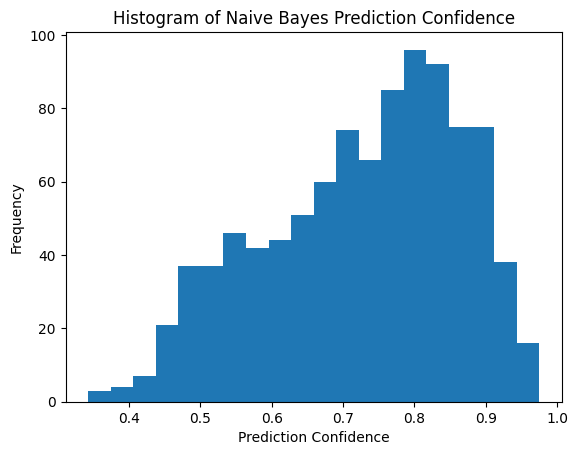

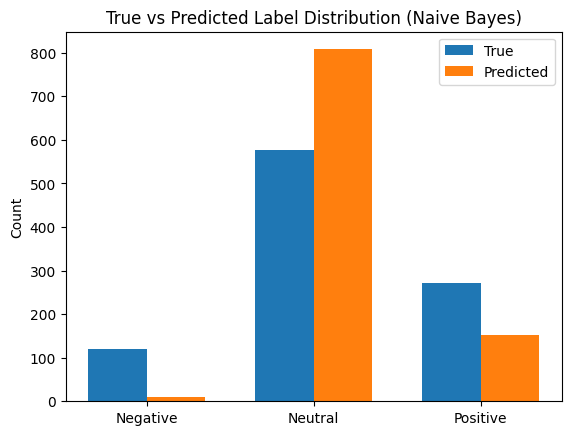

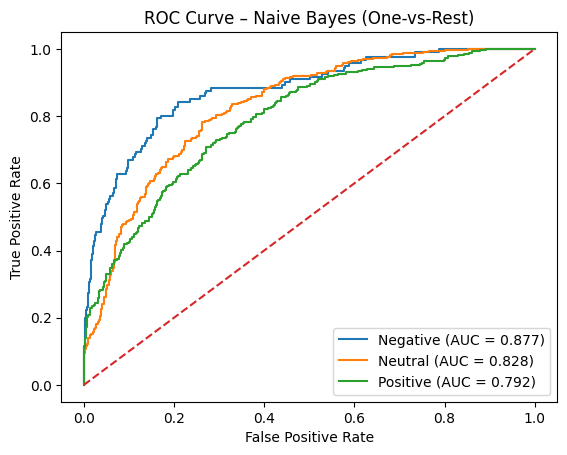

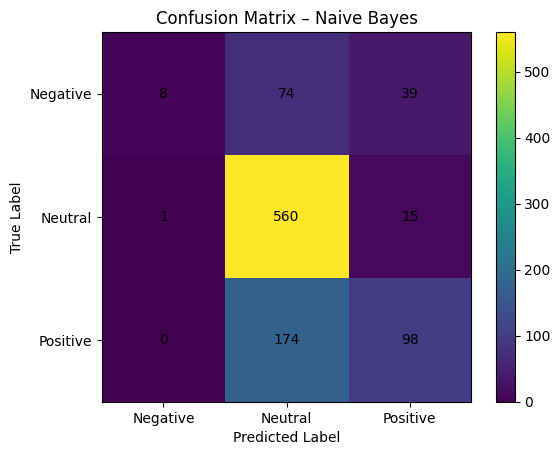

In [ ]:
# =========================================
# Naive Bayes with Visualizations
# =========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)
from sklearn.preprocessing import label_binarize

# =====================
# Load Dataset
# =====================
DATA_PATH = "/content/all-data.csv"

try:
    df = pd.read_csv(DATA_PATH, encoding="latin1")
    df.columns = ["raw_label", "text"]
except:
    df = pd.read_csv(DATA_PATH, sep=";", header=None, encoding="latin1")
    df.columns = ["raw_label", "text"]

print("Dataset loaded")
print(df.head())

# =====================
# Label Mapping
# =====================
label_map = {"negative": 0, "neutral": 1, "positive": 2}
id2label = {0: "Negative", 1: "Neutral", 2: "Positive"}

df = df[df["raw_label"].isin(label_map)]
df["label"] = df["raw_label"].map(label_map)

# =====================
# Clean Text
# =====================
df["text"] = df["text"].astype(str)

# =====================
# Train / Test Split
# =====================
X_train, X_test, y_train, y_test = train_test_split(
    df["text"],
    df["label"],
    test_size=0.2,
    stratify=df["label"],
    random_state=42
)

# =====================
# TF-IDF Vectorization
# =====================
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# =====================
# Naive Bayes Model
# =====================
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# =====================
# Predictions
# =====================
y_pred = nb.predict(X_test_tfidf)
y_proba = nb.predict_proba(X_test_tfidf)

# =====================
# Evaluation Metrics
# =====================
print("\nClassification Report:\n")
print(classification_report(
    y_test,
    y_pred,
    target_names=[id2label[i] for i in sorted(id2label)],
    digits=4
))

# =====================
# Visualization 1: Histogram
# =====================
plt.figure()
plt.hist(y_proba.max(axis=1), bins=20)
plt.xlabel("Prediction Confidence")
plt.ylabel("Frequency")
plt.title("Histogram of Naive Bayes Prediction Confidence")
plt.show()

# =====================
# Visualization 2: Bar Graph
# =====================
true_counts = pd.Series(y_test).value_counts().sort_index()
pred_counts = pd.Series(y_pred).value_counts().sort_index()

labels = [id2label[i] for i in sorted(id2label)]
x = np.arange(len(labels))
width = 0.35

plt.figure()
plt.bar(x - width/2, true_counts, width, label="True")
plt.bar(x + width/2, pred_counts, width, label="Predicted")
plt.xticks(x, labels)
plt.ylabel("Count")
plt.title("True vs Predicted Label Distribution (Naive Bayes)")
plt.legend()
plt.show()

# =====================
# Visualization 3: ROC Curve (One-vs-Rest)
# =====================
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

plt.figure()
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{id2label[i]} (AUC = {roc_auc:.3f})")

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Naive Bayes (One-vs-Rest)")
plt.legend()
plt.show()

# =====================
# Visualization 4: Confusion Matrix (Box Form)
# =====================
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.xticks(range(3), labels)
plt.yticks(range(3), labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Naive Bayes")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.colorbar()
plt.show()


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


218/218 ━━━━━━━━━━━━━━━━━━━━ 30s 128ms/step - accuracy: 0.6093 - loss: 0.8948 - val_accuracy: 0.7371 - val_loss: 0.6530
Epoch 2/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 22s 99ms/step - accuracy: 0.8134 - loss: 0.4748 - val_accuracy: 0.7500 - val_loss: 0.6291
Epoch 3/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.9682 - loss: 0.1241 - val_accuracy: 0.7294 - val_loss: 0.7932
Epoch 4/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 22s 98ms/step - accuracy: 0.9922 - loss: 0.0279 - val_accuracy: 0.7577 - val_loss: 0.8738
Epoch 5/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 30s 49ms/step - accuracy: 0.9969 - loss: 0.0114 - val_accuracy: 0.7603 - val_loss: 0.9296
Epoch 6/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 21s 50ms/step - accuracy: 0.9976 - loss: 0.0093 - val_accuracy: 0.7603 - val_loss: 0.9420
Epoch 7/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 11s 51ms/step - accuracy: 0.9996 - loss: 0.0033 - val_accuracy: 0.7448 - val_loss: 0.9637
Epoch 8/10
218/218 ━━━━━━━━━━━━━━━━━━━━ 22s 60ms/step - accuracy: 0.9994 - loss: 0.0071 - val_accura

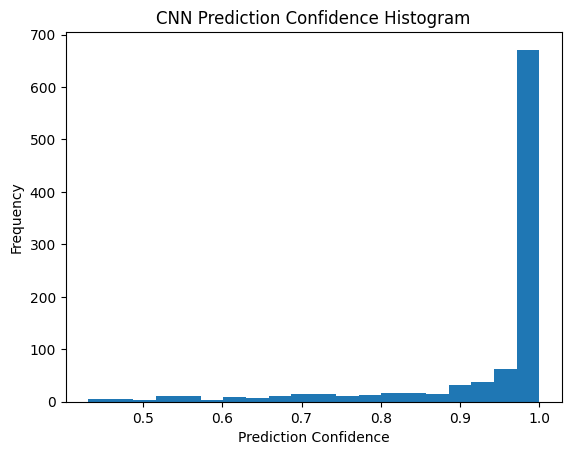

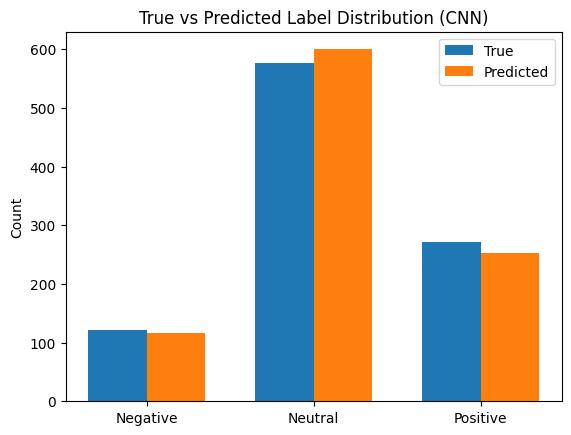

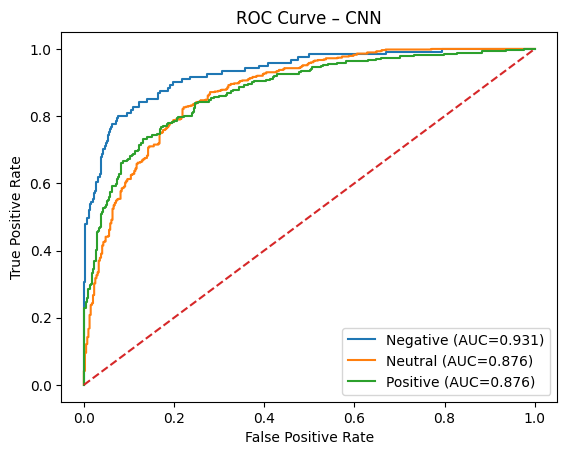

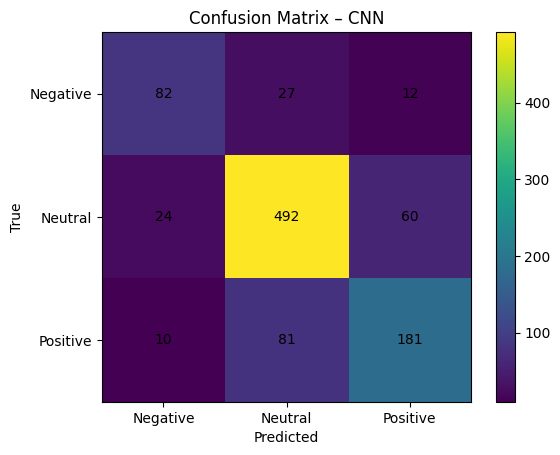

In [ ]:
# =========================================
# CNN for Text Classification + Visualizations
# =========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense

# =====================
# Load Dataset
# =====================
DATA_PATH = "/content/all-data.csv"

try:
    df = pd.read_csv(DATA_PATH, encoding="latin1")
    df.columns = ["raw_label", "text"]
except:
    df = pd.read_csv(DATA_PATH, sep=";", header=None, encoding="latin1")
    df.columns = ["raw_label", "text"]

# =====================
# Label Mapping
# =====================
label_map = {"negative": 0, "neutral": 1, "positive": 2}
id2label = {0: "Negative", 1: "Neutral", 2: "Positive"}

df = df[df["raw_label"].isin(label_map)]
df["label"] = df["raw_label"].map(label_map)
df["text"] = df["text"].astype(str)

# =====================
# Train / Test Split
# =====================
X_train, X_test, y_train, y_test = train_test_split(
    df["text"], df["label"],
    test_size=0.2,
    stratify=df["label"],
    random_state=42
)

# =====================
# Tokenization & Padding
# =====================
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(X_train)

X_train_pad = pad_sequences(
    tokenizer.texts_to_sequences(X_train), maxlen=128
)
X_test_pad = pad_sequences(
    tokenizer.texts_to_sequences(X_test), maxlen=128
)

# =====================
# CNN Model
# =====================
model = Sequential([
    Embedding(20000, 128, input_length=128),
    Conv1D(128, 5, activation="relu"),
    GlobalMaxPooling1D(),
    Dense(64, activation="relu"),
    Dense(3, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=16,
    validation_split=0.1,
    verbose=1
)

# =====================
# Predictions
# =====================
y_proba = model.predict(X_test_pad)
y_pred = np.argmax(y_proba, axis=1)

print(classification_report(
    y_test, y_pred,
    target_names=[id2label[i] for i in range(3)],
    digits=4
))

# =====================
# Histogram (Confidence)
# =====================
plt.figure()
plt.hist(y_proba.max(axis=1), bins=20)
plt.xlabel("Prediction Confidence")
plt.ylabel("Frequency")
plt.title("CNN Prediction Confidence Histogram")
plt.show()

# =====================
# Bar Graph (True vs Predicted)
# =====================
labels = [id2label[i] for i in range(3)]
true_counts = np.bincount(y_test)
pred_counts = np.bincount(y_pred)

x = np.arange(len(labels))
width = 0.35

plt.figure()
plt.bar(x - width/2, true_counts, width, label="True")
plt.bar(x + width/2, pred_counts, width, label="Predicted")
plt.xticks(x, labels)
plt.ylabel("Count")
plt.title("True vs Predicted Label Distribution (CNN)")
plt.legend()
plt.show()

# =====================
# ROC Curve (One-vs-Rest)
# =====================
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

plt.figure()
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    plt.plot(fpr, tpr, label=f"{labels[i]} (AUC={auc(fpr, tpr):.3f})")

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – CNN")
plt.legend()
plt.show()

# =====================
# Confusion Matrix (Box Form)
# =====================
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.xticks(range(3), labels)
plt.yticks(range(3), labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – CNN")

for i in range(3):
    for j in range(3):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.colorbar()
plt.show()


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [14:10:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


              precision    recall  f1-score   support

    Negative     0.7816    0.5620    0.6538       121
     Neutral     0.7784    0.9271    0.8463       576
    Positive     0.7398    0.5331    0.6197       272

    accuracy                         0.7709       969
   macro avg     0.7666    0.6741    0.7066       969
weighted avg     0.7680    0.7709    0.7586       969



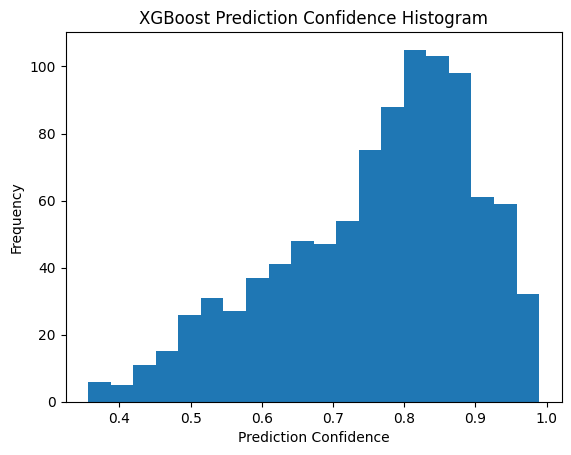

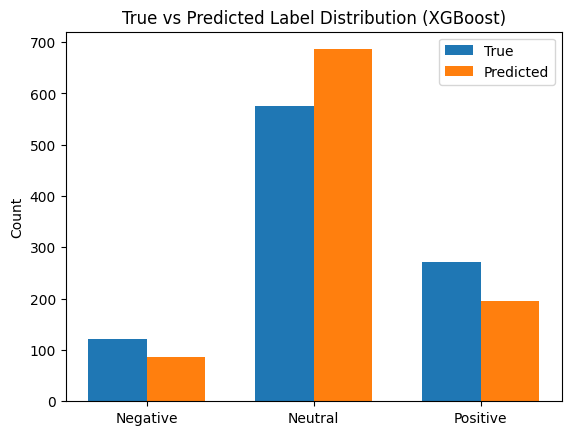

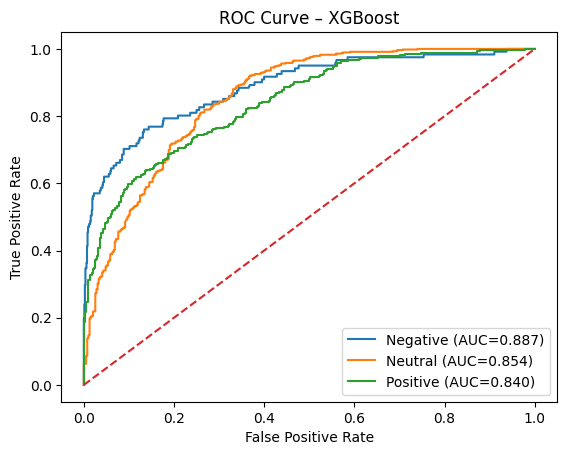

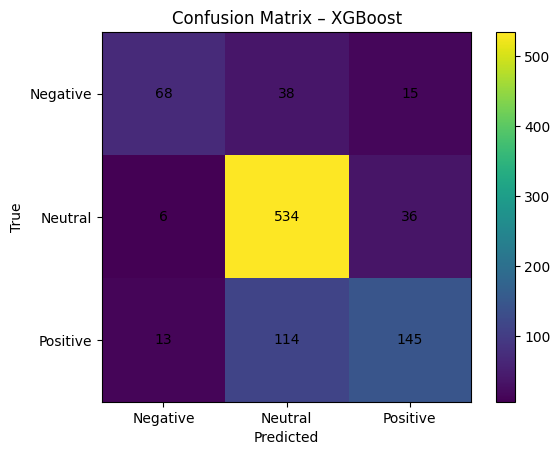

In [ ]:
# =========================================
# XGBoost Text Classification + Visualizations
# =========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

from xgboost import XGBClassifier

# =====================
# Load Dataset
# =====================
DATA_PATH = "/content/all-data.csv"

try:
    df = pd.read_csv(DATA_PATH, encoding="latin1")
    df.columns = ["raw_label", "text"]
except:
    df = pd.read_csv(DATA_PATH, sep=";", header=None, encoding="latin1")
    df.columns = ["raw_label", "text"]

# =====================
# Label Mapping
# =====================
label_map = {"negative": 0, "neutral": 1, "positive": 2}
id2label = {0: "Negative", 1: "Neutral", 2: "Positive"}

df = df[df["raw_label"].isin(label_map)]
df["label"] = df["raw_label"].map(label_map)
df["text"] = df["text"].astype(str)

# =====================
# Train / Test Split
# =====================
X_train, X_test, y_train, y_test = train_test_split(
    df["text"], df["label"],
    test_size=0.2,
    stratify=df["label"],
    random_state=42
)

# =====================
# TF-IDF
# =====================
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# =====================
# XGBoost Model
# =====================
xgb = XGBClassifier(
    objective="multi:softprob",  # required for ROC
    num_class=3,
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    eval_metric="mlogloss",
    use_label_encoder=False
)

xgb.fit(X_train_tfidf, y_train)

# =====================
# Predictions
# =====================
y_pred = xgb.predict(X_test_tfidf)
y_proba = xgb.predict_proba(X_test_tfidf)

print(classification_report(
    y_test, y_pred,
    target_names=[id2label[i] for i in range(3)],
    digits=4
))

# =====================
# Histogram (Confidence)
# =====================
plt.figure()
plt.hist(y_proba.max(axis=1), bins=20)
plt.xlabel("Prediction Confidence")
plt.ylabel("Frequency")
plt.title("XGBoost Prediction Confidence Histogram")
plt.show()

# =====================
# Bar Graph (True vs Predicted)
# =====================
labels = [id2label[i] for i in range(3)]
true_counts = np.bincount(y_test)
pred_counts = np.bincount(y_pred)

x = np.arange(len(labels))
width = 0.35

plt.figure()
plt.bar(x - width/2, true_counts, width, label="True")
plt.bar(x + width/2, pred_counts, width, label="Predicted")
plt.xticks(x, labels)
plt.ylabel("Count")
plt.title("True vs Predicted Label Distribution (XGBoost)")
plt.legend()
plt.show()

# =====================
# ROC Curve (One-vs-Rest)
# =====================
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

plt.figure()
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    plt.plot(fpr, tpr, label=f"{labels[i]} (AUC={auc(fpr, tpr):.3f})")

plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – XGBoost")
plt.legend()
plt.show()

# =====================
# Confusion Matrix (Box Form)
# =====================
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm)
plt.xticks(range(3), labels)
plt.yticks(range(3), labels)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – XGBoost")

for i in range(3):
    for j in range(3):
        plt.text(j, i, cm[i, j], ha="center", va="center")

plt.colorbar()
plt.show()
